
**Finding the optimal neural network architecture to classify the Sign-Langauage Digits dataset using Bayesian optimization.**

**Dependancies**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [ ]:
%load gp.py
%run gp.py

In [ ]:
X = np.load("./Sign-language-digits-dataset/X.npy")
Y = np.load("./Sign-language-digits-dataset/Y.npy")

In [ ]:
# Since X is a .npy I will use manual ways to figure it out.

print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


Y (labels) are one-hot-encoded.

Also, the X (features) are Scaled between 0 and 1. 

### **Plotting each classes of image**

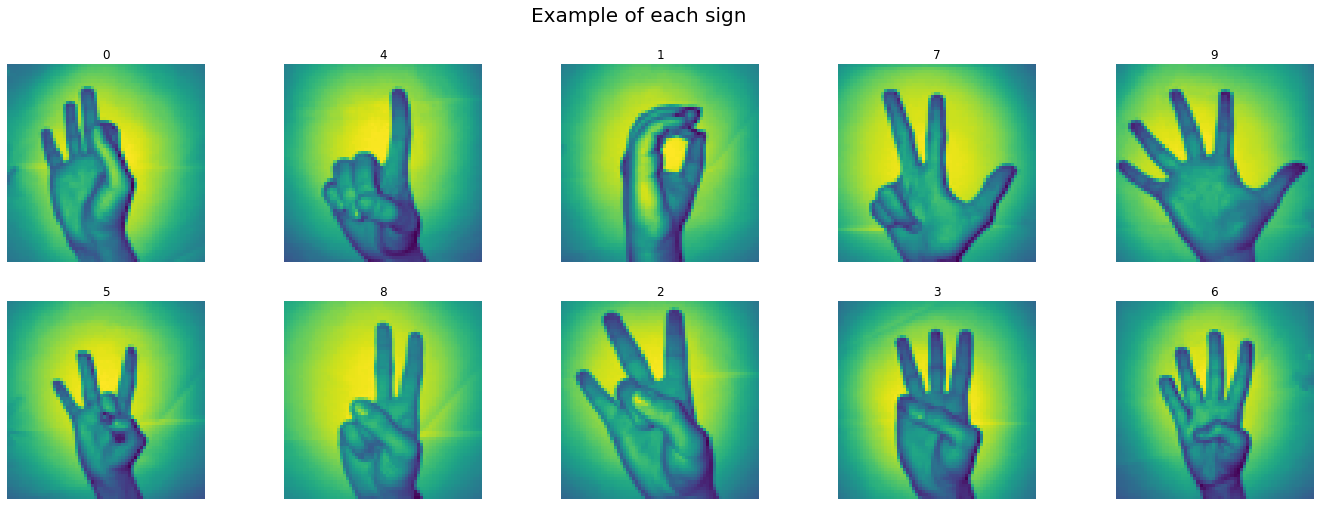

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

The dataset is designed this way (digits do not correctly map in our order). It is a **Dynamic architecture**.


**Dividing each class to visualize**

In [ ]:
x_9 = X[:204]; x_0 = X[204:409]; x_7 = X[409:615]; x_6 = X[615:822]; x_1 = X[822:1028]; 
x_8 = X[1028:1236]; x_4 = X[1236:1443]; x_3 = X[1443:1649]; x_2 = X[1649:1855]; x_5 = X[1855:];

** Getting mean of each digits to have an idea**

In [ ]:
mean0 = x_0.mean(axis=0); mean1 = x_1.mean(axis=0); mean2 = x_2.mean(axis=0);
mean3 = x_3.mean(axis=0); mean4 = x_4.mean(axis=0); mean5 = x_5.mean(axis=0);
mean6 = x_6.mean(axis=0); mean7 = x_7.mean(axis=0); mean8 = x_8.mean(axis=0); mean9 = x_9.mean(axis=0);

### **Plotting the average of each class**

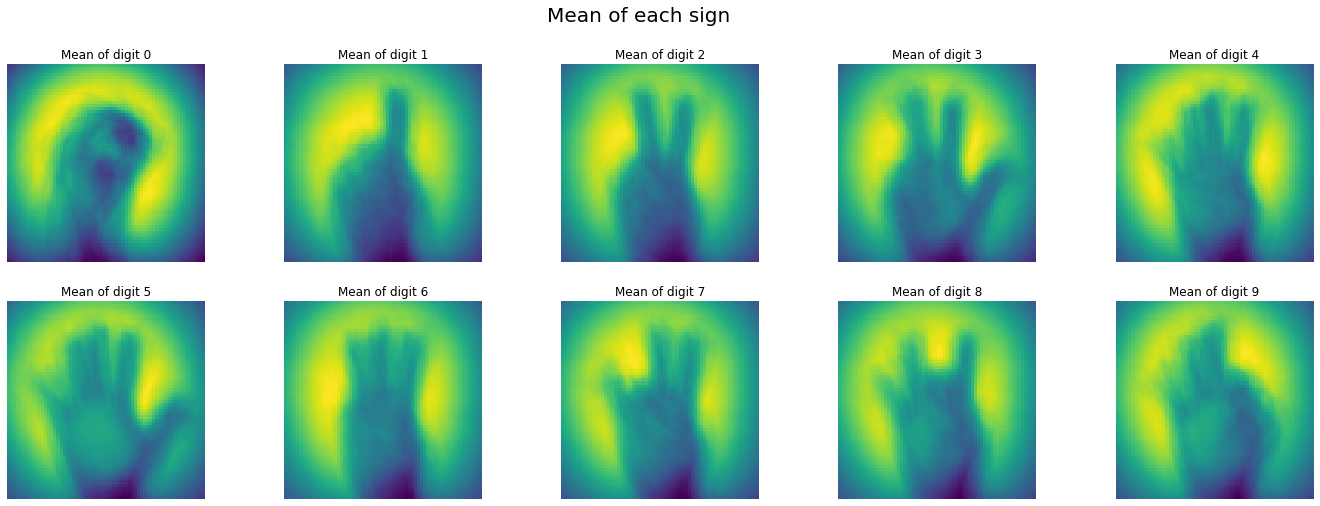

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title("Mean of digit 0")
plt.imshow(mean0)
plt.axis("off")

plt.subplot(2,5,2)
plt.title("Mean of digit 1")
plt.imshow(mean1)
plt.axis("off")

plt.subplot(2,5,3)
plt.title("Mean of digit 2")
plt.imshow(mean2)
plt.axis("off")

plt.subplot(2,5,4)
plt.title("Mean of digit 3")
plt.imshow(mean3)
plt.axis("off")

plt.subplot(2,5,5)
plt.title("Mean of digit 4")
plt.imshow(mean4)
plt.axis("off")

plt.subplot(2,5,6)
plt.title("Mean of digit 5")
plt.imshow(mean5)
plt.axis("off")

plt.subplot(2,5,7)
plt.title("Mean of digit 6")
plt.imshow(mean6)
plt.axis("off")

plt.subplot(2,5,8)
plt.title("Mean of digit 7")
plt.imshow(mean7)
plt.axis("off")

plt.subplot(2,5,9)
plt.title("Mean of digit 8")
plt.imshow(mean8)
plt.axis("off")

plt.subplot(2,5,10)
plt.title("Mean of digit 9")
plt.imshow(mean9)
plt.axis("off")

plt.suptitle("Mean of each sign", fontsize=20)
plt.show()

Above it's easy to see there are some visible characteristic differences between pictures( e.g. 5 vs 0 ) . which is what I want since it's a classification problem.

### **Splitting train and test**

I have split the dataset into the following:
80% Training
10% Validation
10% Test

In [ ]:
x_train, x_testval, y_train, y_testval = train_test_split(X,Y,random_state=111,test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_testval,y_testval,random_state=112,test_size=0.5)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
x_val = x_val.reshape(-1,64,64,1)

## **Creating the base CNN model**

In [ ]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

### **Model Summary**

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

**Training**

In [ ]:
CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Epoch 1/70
52/52 [==============================] - 1s 18ms/step - loss: 2.3034 - accuracy: 0.1019 - val_loss: 2.3030 - val_accuracy: 0.0680
Epoch 2/70
52/52 [==============================] - 1s 11ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0680
Epoch 3/70
52/52 [==============================] - 1s 11ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3025 - val_accuracy: 0.0680
Epoch 4/70
52/52 [==============================] - 1s 11ms/step - loss: 2.3025 - accuracy: 0.1158 - val_loss: 2.3026 - val_accuracy: 0.1359
Epoch 5/70
52/52 [==============================] - 1s 11ms/step - loss: 2.3010 - accuracy: 0.1231 - val_loss: 2.2964 - val_accuracy: 0.1505
Epoch 6/70
52/52 [==============================] - 1s 12ms/step - loss: 2.1246 - accuracy: 0.2268 - val_loss: 1.9435 - val_accuracy: 0.2864
Epoch 7/70
52/52 [==============================] - 1s 11ms/step - loss: 1.6569 - accuracy: 0.3887 - val_loss: 1.4689 - val_accuracy: 0.4854
Epoch 8/70
52

**Plotting the results**

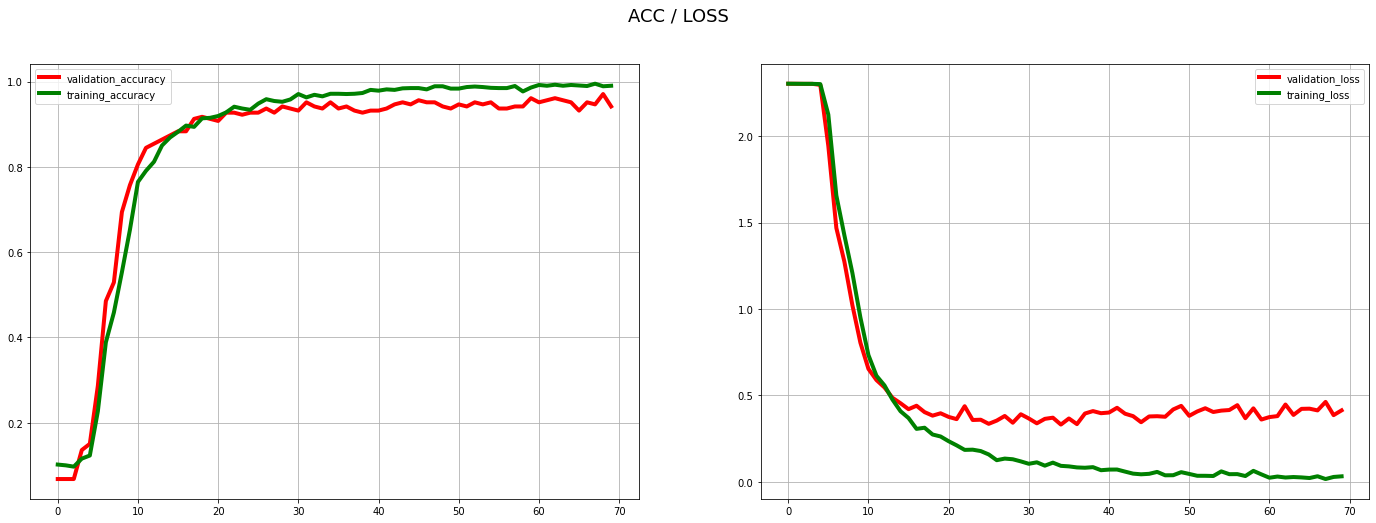

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

###**Bayesian Optimization**

Now we will try to find the optimal CNN using Bayesian optimization

**Creating the Architecture**

In [ ]:
def CNN(conv_layer1,kernel,pool,dense_layer1,dense_node1):
  model = Sequential()
  model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
  model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
  for i in range(conv_layer1):
      model.add(Conv2D(filters=32,kernel_size=(kernel,kernel),activation="relu",padding="same"))
      model.add(MaxPooling2D(pool_size=(pool,pool),padding="same"))
  model.add(Flatten())
  for j in range(dense_layer1):
        model.add(Dense(dense_node1,activation = 'softmax'))
  model.add(Dense(10,activation= 'softmax'))
  model.compile(optimizer=Adam(lr=0.002,decay=0.001),loss='categorical_crossentropy',metrics=["accuracy"])
  return model

In [ ]:
def metric(parameters):

    architecture = CNN(conv_layer1 = np.int(parameters[0]) , kernel= np.int(parameters[1]),
                       pool = np.int(parameters[2]),dense_layer1 = np.int(parameters[3]), 
                       dense_node1 = np.int(parameters[4]))
    model = architecture.fit(x=x_train,y=y_train,epochs=20,validation_data=(x_val,y_val))
    loss = model.history['val_loss'][-1]
    return loss

###Finding the optimal value of our parameter using Bayesian Optimization

In [ ]:
bounds = np.array([[1, 5],[1,7],[1,4],[0, 4],[64,512]])

In [ ]:
params,met  = bayesian_optimisation(n_iters=5, sample_loss=metric, bounds=bounds)

Epoch 1/20
52/52 [==============================] - 1s 12ms/step - loss: 2.3037 - accuracy: 0.0800 - val_loss: 2.3033 - val_accuracy: 0.1159
Epoch 2/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3035 - accuracy: 0.1007 - val_loss: 2.3051 - val_accuracy: 0.0676
Epoch 3/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3031 - accuracy: 0.0958 - val_loss: 2.3041 - val_accuracy: 0.0676
Epoch 4/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3028 - accuracy: 0.0946 - val_loss: 2.3042 - val_accuracy: 0.0918
Epoch 5/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3031 - accuracy: 0.1001 - val_loss: 2.3048 - val_accuracy: 0.0676
Epoch 6/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3055 - val_accuracy: 0.0918
Epoch 7/20
52/52 [==============================] - 0s 6ms/step - loss: 2.3031 - accuracy: 0.0946 - val_loss: 2.3051 - val_accuracy: 0.0918
Epoch 8/20
52/52 [=

In [ ]:
opt_param = params[np.array(met).argmin(), :]
opt_param = np.round(opt_param)
print(opt_param)


[  4.   4.   3.   0. 426.]


###**Fitting the best model**

In [ ]:
best = CNN(int(opt_param[0]),int(opt_param[1]),int(opt_param[2]),
           int(opt_param[3]),int(opt_param[4]))
best.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 4, 4, 32)        

In [ ]:
best_model=best.fit(x_train,y_train,epochs=40,validation_data=(x_val,y_val))

Epoch 1/40
52/52 [==============================] - 1s 14ms/step - loss: 2.3044 - accuracy: 0.0891 - val_loss: 2.3039 - val_accuracy: 0.0676
Epoch 2/40
52/52 [==============================] - 0s 5ms/step - loss: 2.3025 - accuracy: 0.0922 - val_loss: 2.2966 - val_accuracy: 0.1643
Epoch 3/40
52/52 [==============================] - 0s 5ms/step - loss: 1.9066 - accuracy: 0.3123 - val_loss: 1.5626 - val_accuracy: 0.4010
Epoch 4/40
52/52 [==============================] - 0s 5ms/step - loss: 1.1558 - accuracy: 0.5531 - val_loss: 0.8893 - val_accuracy: 0.6763
Epoch 5/40
52/52 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.7599 - val_loss: 0.5893 - val_accuracy: 0.8068
Epoch 6/40
52/52 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.8539 - val_loss: 0.4220 - val_accuracy: 0.8551
Epoch 7/40
52/52 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 0.9036 - val_loss: 0.2805 - val_accuracy: 0.9082
Epoch 8/40
52/52 [=

###Training Plot

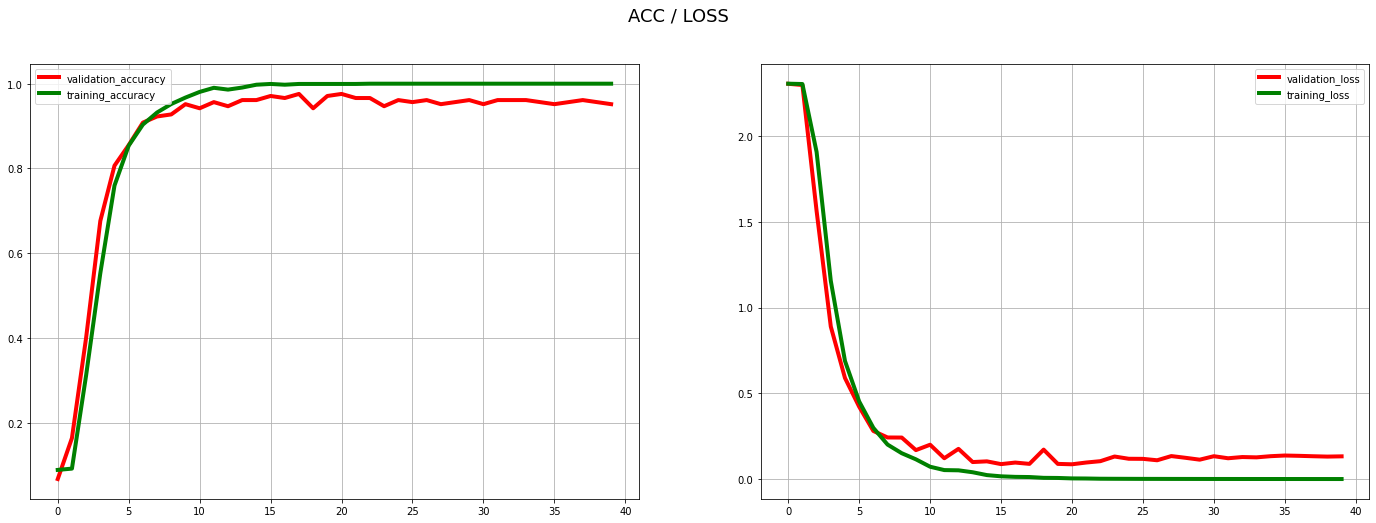

In [ ]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(best_model.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(best_model.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(best_model.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(best_model.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

##**Finally testing our model using our Test-set**

In [ ]:
test_scores=best.evaluate(x_test, y_test)


In [ ]:
print(test_scores[1])

0.9563106894493103


We get a test accuracy of **95.6%**


**Predictions of test data and Classification Report**

In [ ]:
output=best.predict(x_test)
pred_label=np.argmax(output,axis=1)
correct_label=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(correct_label,pred_label))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       1.00      0.95      0.98        21
           2       0.92      0.92      0.92        25
           3       0.95      0.95      0.95        19
           4       0.96      1.00      0.98        25
           5       0.95      0.88      0.91        24
           6       0.95      1.00      0.97        19
           7       0.91      1.00      0.95        21
           8       1.00      0.90      0.95        20
           9       1.00      1.00      1.00        18

    accuracy                           0.95       206
   macro avg       0.95      0.95      0.95       206
weighted avg       0.95      0.95      0.95       206

